In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

%matplotlib inline

ImportError: No module named statsmodels.api

In [2]:
df = pd.read_csv("ev_fiyatları.txt")
df.head()

,Bölgenin Ort. Geliri,Ort. Ev Yaşı,Ort. oda sayısı,Ort. Yatak odası sayısı,Ort. Nüfus,Ev Fiyatı,Adres
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bölgenin Ort. Geliri     5000 non-null   float64
 1   Ort. Ev Yaşı             5000 non-null   float64
 2   Ort. oda sayısı          5000 non-null   float64
 3   Ort. Yatak odası sayısı  5000 non-null   float64
 4   Ort. Nüfus               5000 non-null   float64
 5   Ev Fiyatı                5000 non-null   float64
 6   Adres                    5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.describe()

,Bölgenin Ort. Geliri,Ort. Ev Yaşı,Ort. oda sayısı,Ort. Yatak odası sayısı,Ort. Nüfus,Ev Fiyatı
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


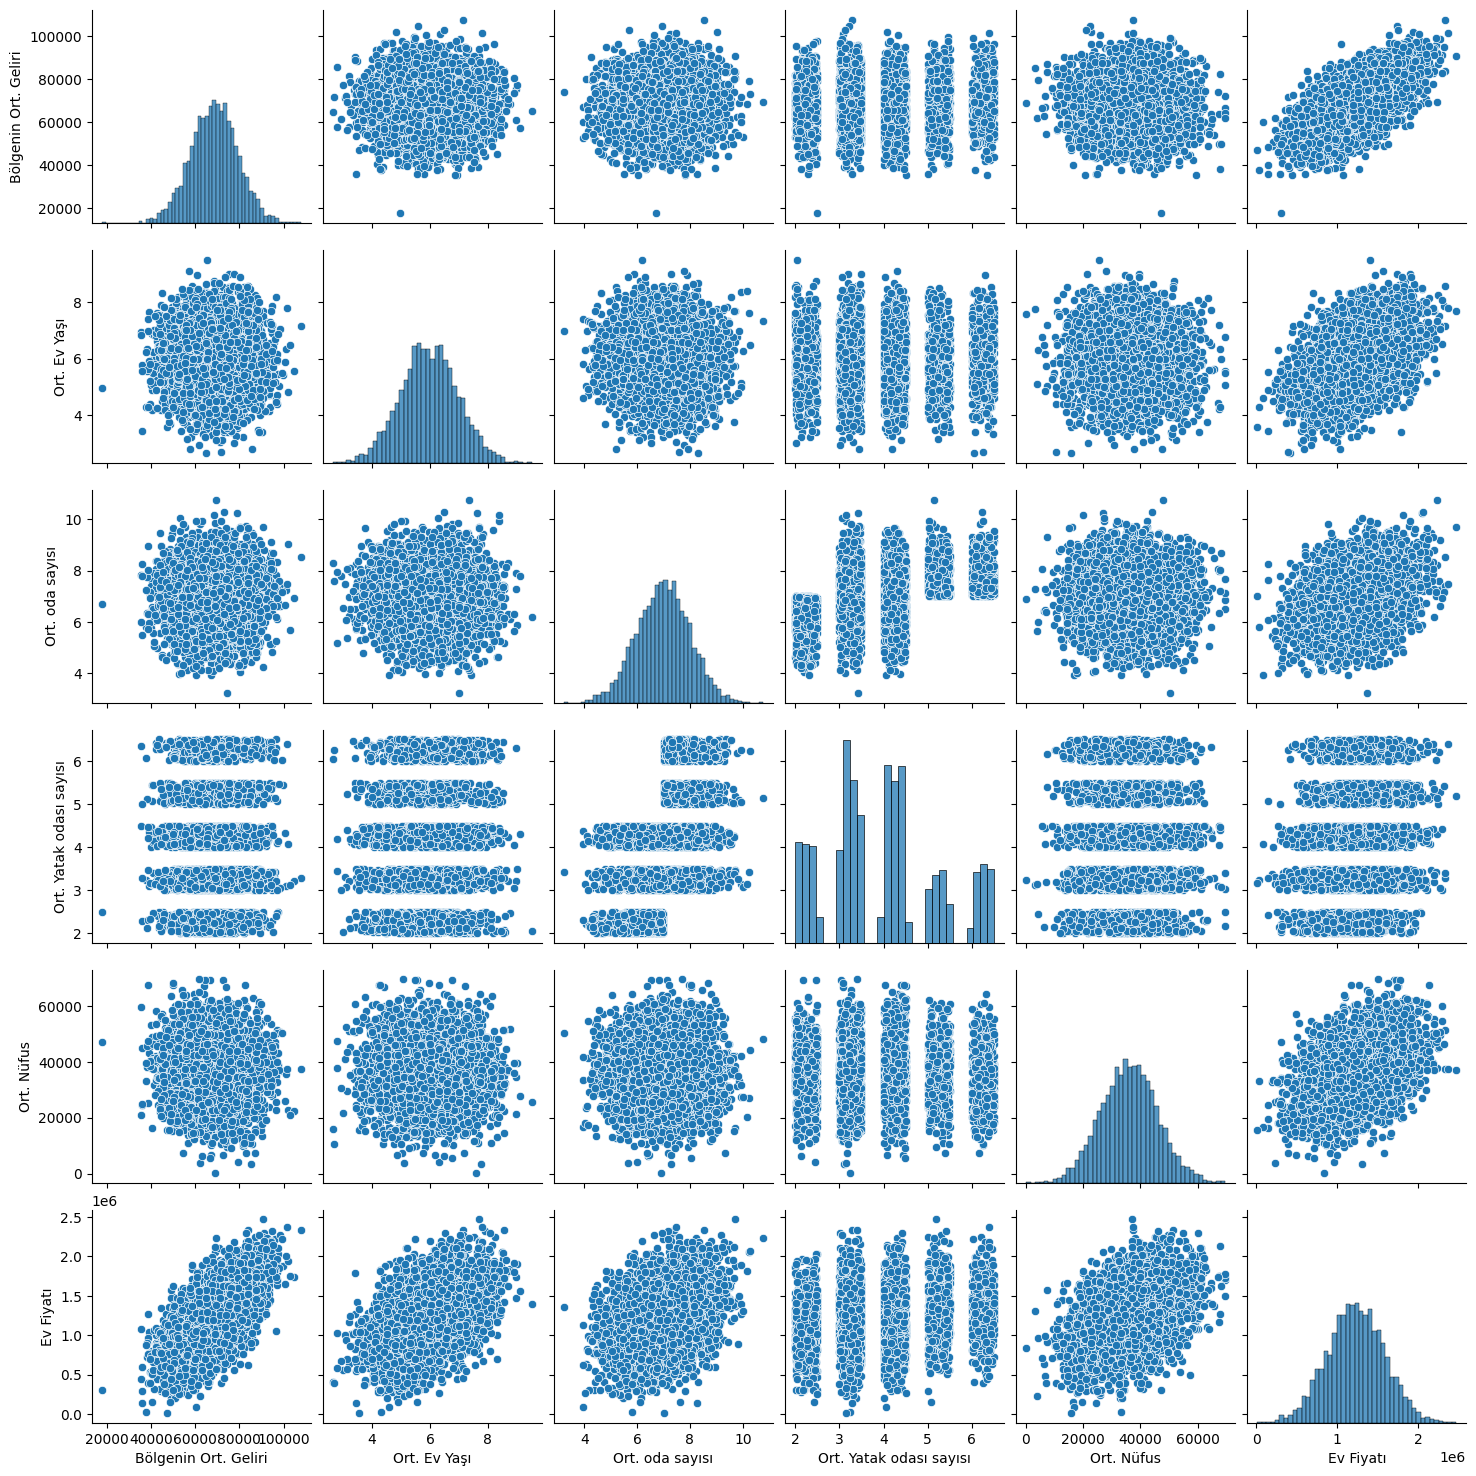

In [5]:
sns.pairplot(df)

C:\Users\oguzh\AppData\Local\Temp\ipykernel_7408\874241591.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ev Fiyatı'])


<AxesSubplot:xlabel='Ev Fiyatı', ylabel='Density'>

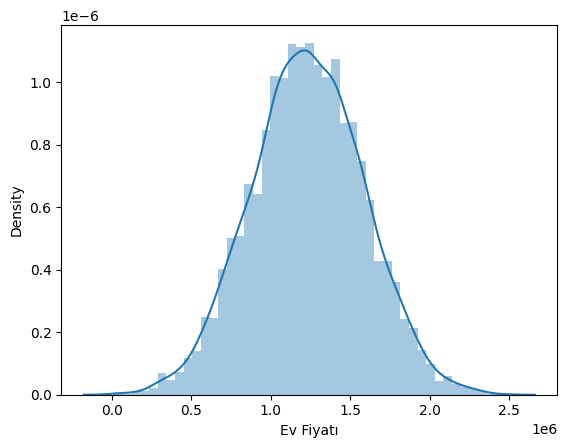

In [6]:
sns.distplot(df['Ev Fiyatı'])

<AxesSubplot:>

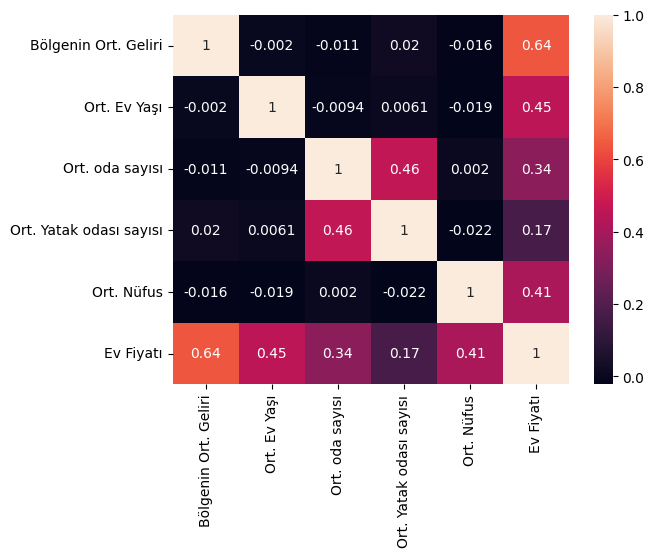

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
X = df.drop(["Ev Fiyatı","Adres"],axis=1)
y = df['Ev Fiyatı']
X.head()


,Bölgenin Ort. Geliri,Ort. Ev Yaşı,Ort. oda sayısı,Ort. Yatak odası sayısı,Ort. Nüfus
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [11]:
print(model.intercept_)

-2635072.900933357


In [13]:
Katsayılar = pd.DataFrame(model.coef_,X.columns,columns=['Katsayılar (Beta)'])
Katsayılar

,Katsayılar (Beta)
Bölgenin Ort. Geliri,21.652206
Ort. Ev Yaşı,164666.480722
Ort. oda sayısı,119624.012232
Ort. Yatak odası sayısı,2440.377611
Ort. Nüfus,15.270313


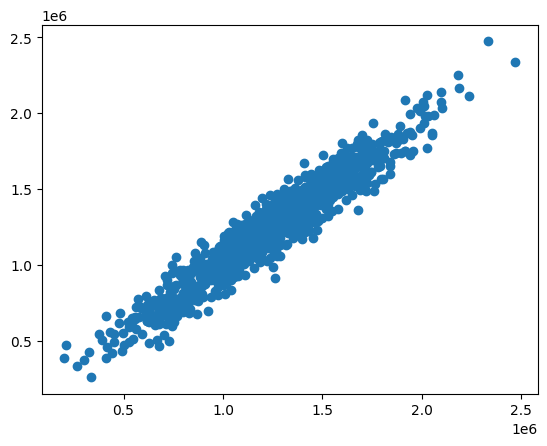

In [15]:
tahminler = model.predict(X_test)
plt.scatter(y_test,tahminler)

C:\Users\oguzh\AppData\Local\Temp\ipykernel_7408\2387002889.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-tahminler),bins=50);


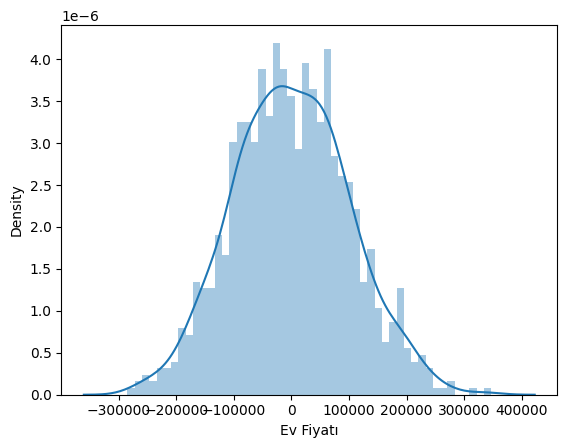

In [17]:
sns.distplot((y_test-tahminler),bins=50);

In [19]:
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Ev Fiyatı   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.702e+04
Date:                Tue, 24 Jan 2023   Prob (F-statistic):                        0.00
Time:                        00:25:33   Log-Likelihood:                         -69078.
No. Observations:                5000   AIC:                                  1.382e+05
Df Residuals:                    4995   BIC:                                  1.382e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Bölgenin Ort. Geliri       10.2372      0.269     38.106      0.000       9.711      10.764
Ort. Ev Yaşı              5.13e+04   2960.917     17.324      0.000    4.55e+04    5.71e+04
Ort. oda sayısı         -9614.4333   3262.997     -2.947      0.003    -1.6e+04   -3217.527
Ort. Yatak odası sayısı  4082.3129   3132.333      1.303      0.193   -2058.435    1.02e+04
Ort. Nüfus                  8.0918      0.327     24.745      0.000       7.451       8.733
==============================================================================
Omnibus:                        0.446   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.800   Jarque-Bera (JB):                0.490
Skew:                          -0.012   Prob(JB):                        0.783
Kurtosis:                       2.958   Cond. No.                     9.30e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""